In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Cargar el dataset procesado
data = pd.read_csv('data_evaluacion_processed.csv')

In [21]:
# Separar características y etiqueta
X = data.drop('salary', axis=1)
y = data['salary']

In [23]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Elegir un valor específico de k
k = 221

In [29]:
# Aplicar k-NN con el valor de k seleccionado
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [30]:
# Evaluación del modelo
print(f'\nk-NN with k={k}')
print('Train Accuracy : %.5f' % knn.score(X_train_scaled, y_train))
print('Test Accuracy : %.5f' % knn.score(X_test_scaled, y_test))
print("Precisión del modelo:", accuracy_score(y_test, y_pred_knn))


k-NN with k=221
Train Accuracy : 0.82781
Test Accuracy : 0.82045
Precisión del modelo: 0.8204524516327157


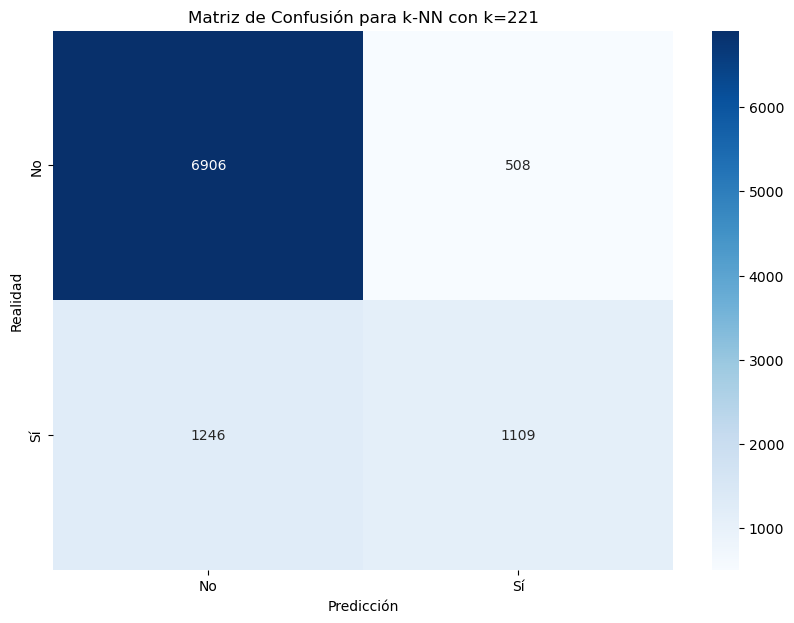

In [43]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_knn)

# Crear una figura y un eje
plt.figure(figsize=(10, 7))

# Graficar la matriz de confusión usando seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])

# Añadir etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title(f'Matriz de Confusión para k-NN con k={k}')

# Mostrar la gráfica
plt.show()